# 1. Audiobooks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/peerkart

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/peerkart


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf

# 2. Import file
* read the csv file
* do the train, test and vali split
* create dataframes for inputs and targets

In [ ]:
df = pd.read_csv('01_preprocessing.csv')
train_inputs = df[df['flag']=='Training'].drop(['flag','11'], axis=1)
train_targets = df[df['flag']=='Training'][['11']]
print(train_inputs.shape)

df = pd.read_csv('01_preprocessing.csv')
test_inputs = df[df['flag']=='Test'].drop(['flag','11'], axis=1)
test_targets = df[df['flag']=='Test'][['11']]
print(test_inputs.shape)

df = pd.read_csv('01_preprocessing.csv')
validation_inputs = df[df['flag']=='Validate'].drop(['flag','11'], axis=1)
validation_targets = df[df['flag']=='Validate'][['11']]
print(validation_inputs.shape)

(16122, 10)
(2303, 10)
(4607, 10)


# 3. Model
Outline, optimizers, loss, early stopping and training

In [ ]:
input_size = 10
output_size = 2
hidden_layer_size = 10
model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 3rd hidden layer
                             tf.keras.layers.Dense(output_size, activation='softmax') # output layer
                             ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 400
max_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
tf.keras.utils.set_random_seed(108)
tf.config.experimental.enable_op_determinism()

history = model.fit(train_inputs, train_targets, batch_size=batch_size, epochs=max_epochs, callbacks=[early_stopping],
                    validation_data=(validation_inputs, validation_targets), verbose=2)

Epoch 1/100
41/41 - 3s - loss: 0.6968 - accuracy: 0.5422 - val_loss: 0.6754 - val_accuracy: 0.6065 - 3s/epoch - 76ms/step
Epoch 2/100
41/41 - 0s - loss: 0.6549 - accuracy: 0.6455 - val_loss: 0.6239 - val_accuracy: 0.6931 - 231ms/epoch - 6ms/step
Epoch 3/100
41/41 - 0s - loss: 0.5897 - accuracy: 0.7098 - val_loss: 0.5495 - val_accuracy: 0.7321 - 213ms/epoch - 5ms/step
Epoch 4/100
41/41 - 0s - loss: 0.5224 - accuracy: 0.7435 - val_loss: 0.4891 - val_accuracy: 0.7645 - 220ms/epoch - 5ms/step
Epoch 5/100
41/41 - 0s - loss: 0.4747 - accuracy: 0.7596 - val_loss: 0.4503 - val_accuracy: 0.7801 - 395ms/epoch - 10ms/step
Epoch 6/100
41/41 - 0s - loss: 0.4423 - accuracy: 0.7795 - val_loss: 0.4236 - val_accuracy: 0.7925 - 241ms/epoch - 6ms/step
Epoch 7/100
41/41 - 0s - loss: 0.4192 - accuracy: 0.7879 - val_loss: 0.4056 - val_accuracy: 0.7999 - 257ms/epoch - 6ms/step
Epoch 8/100
41/41 - 0s - loss: 0.4031 - accuracy: 0.7947 - val_loss: 0.3931 - val_accuracy: 0.8064 - 232ms/epoch - 6ms/step
Epoch 9/1

# 4. Model Loss

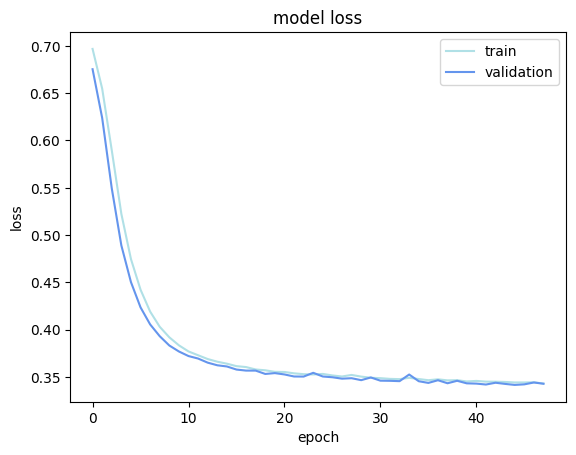

In [ ]:
plt.plot(history.history['loss'], color='powderblue')
plt.plot(history.history['val_loss'], color='cornflowerblue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# 5. Test

In [ ]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

72/72 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8350

Test loss: 0.33. Test accuracy: 83.50%
